# How long would it take to fall into space?

**A computational essay by Karl Henrik Fredly, undergraduate at the University of Oslo (karlhf@student.uv.uio.no)**

## Introduction

What if gravity suddenly started pushing you into the sky, instead of toward the ground? How long would it take you to reach outer space? How fast would you be going?

In this computational essay, we are going to look at how long it would take to reach space if Earth pushed you away instead of pulling you in. We will also look at how air resistance would slow you down, and how it would change as you move through the atmosphere.

<img src="Resources/FallingIntoSpaceResources/Astronaut-in-space.jpg" alt="Drawing" style="width: 70%;"/>

*At about 100 meters from the cargo bay of the space shuttle Challenger, Bruce McCandless II was further out than anyone had ever been before. Guided by a Manned Maneuvering Unit (MMU), astronaut McCandless, pictured above, was floating free in space. McCandless and fellow NASA astronaut Robert Stewart were the first to experience such an "untethered space walk" during Space Shuttle mission 41-B in 1984.*

Taken 12.February 1984 (from <a href="https://commons.wikimedia.org/wiki/File:Astronaut-in-space.jpg"> Wikimedia Commons</a>)

## What does it mean to fall into space?

We have a pretty good idea about what space is, it's everything outside the Earth. But where does Earth stop and space begin? The atmosphere disappears so gradually that there is no definitive anwser. An altitude of 100km above sea level is often used to mark the beginning of space for space, this limit is called the Kármán line. This is the height you will be falling to in this thought-experiment.

So what does falling mean? In physics, something is in free fall when it is affected only by gravity. This means that the object could be moving in any direction, as long as there are no other forces acting on it. We will not be looking at this kind of fall. Instead of gravity, we will be looking at a kind of anti-gravity. Furthermore, it will not be the only force acting on the object, as we will include air resistance in our model.

In this essay we will define a formula for anti-gravity and air-resistance, and use them together with the Euler-Cromer method to calculate the movement of the fall.

In [1]:
import numpy as np #Numpy is useful for calculations
import matplotlib.pyplot as plt #Matplotlib gives us access to plotting tools for showing our results
print("hello2")

hello2


### Anti-Gravity

Gravity causes objects to attract. Gravity is what makes the Earth orbit the Sun and apples fall to the ground. To calculate the force of gravity between two objects we use the formula: $ F = \frac{GM_{1}M_{2}}{r^2} $, where $G$ is the gravitational constant, $M_1$ and $M_2$ are the masses of the objects, and $r$ is the distance between them. This gravitational force acts on both objects, and it always points from one object to the other, pulling them closer. The $r^2$ factor in the formula is essential to the behaviour of gravity, as it means that gravity is much weaker when things are futher apart.

<img src="Resources/FallingIntoSpaceResources/slot.jpg" alt="Drawing" style="width: 70%;"/>

But what if gravity pointed the other way? What if gravity pushed things away from eachother? This is a very exiting question with many different avenues to explore(most of them ending with everyone dying), but it will not be the focus of this essay. Gravity will instead only push only you away from Earth.

What this means in practice is that a force given by the formula $ F = \frac{GMm}{r^2} $, where $M$ is the mass of the Earth and $m$ is your mass, will push you off the face of planet (given that you're outside).

Just like with ordinary gravity, you mass won't have an impact on your acceleration. Newtons second law together with our formula for anti-gravity gives us that $F = ma = \frac{GMm}{r^2} \Rightarrow a = \frac{GM}{r^2} $

In [2]:
G = 6.674 * 10**(-11) #Gravitational constant
M = 5.972 * 10**24 #Mass of the Earth
R_Earth = 6.371 * 10**6 #Radius of the Earth

#This function takes your current height above the ground and returns your current acceleration due to anti-gravity
def antiGravAccel(h):
    return G * M / (R_Earth + h)**2
#Note that this function returns a positive acceleration, which will increase your speed in the upward direction
#If you were to add a minus sign here, you would have a function for normal gravity instead, pushing you down
#You should try reversing gravity again and starting the fall up in the air to see how a "normal fall" would be

## Air Resistance

Air resistance (often called drag) is the force which the air exerts on an object moving through it, acting in the direction opposite of the relative motion. Air resistance is what makes leaves fall slowly toward the ground. It is also what makes strong winds able to push you around.

Calculating air resistance can be as complex as you want it to be. Real world objects have complex shapes and surfaces, and real world fluids move in ways we cannot control or account for. For the purpose of this essay we will be using the drag equation to calculate air resistance. The drag equation works well at relatively high velocities, which is what we will be looking at.

The drag equation is given by $F_D = \frac{1}{2} \rho v^2 C_D A$ where $\rho$ is the air-density, $v$ is the velocity, $C_D$ is the drag coefficient, and $A$ is the cross sectional area.

In [3]:
def drag(rho, v, Cd, A):
    return -0.5 * rho * v * abs(v) * Cd * A
#The minus sign and the v * abs(v) here insures that drag will work in the direction opposite of the one you're moving

We will be looking at you falling, so we will use a cross sectional area of $0.18m^2$ and a drag coefficient of $0.7$ for a head first fall. (Alternatively, we could have used a cross sectional area of $0.7m^2$ and a drag coefficient of $1.0$ for a belly-to-earth position.)

Drag coefficients are very complex and are often determined using wind tunnels, and in reality even vary with velocity, so we will not go into the calculation of them here. The values we will use were taken from <a href="https://cnx.org/exports/be308439-f9b1-40e7-b0a6-1631cbc7feaa@8.pdf/drag-forces-8.pdf">here</a> (download link for pdf, see wikipedia entry using same values <a href="https://en.wikipedia.org/wiki/Speed_skydiving">here</a>), and are generous estimates not suited for imporant calculations.

That leaves us with finding the velocity and air density to calculate the drag force. These values are not static, but will change as you fall closer and closer to space. The velocity will be found as we do the calculation. As we have a starting position on the ground, and an initial acceleration due to anti-gravity, we will be able to find the velocity as we go along. The air density will need it's own section though.

### The Density of the Atmosphere

Density is how much mass of something there is per unit volume. Hence, to measure the density of something you can measure its mass and divide it by its volume. At sea level, air has a density of $1.225 kg/m^3$. This means that a cubic metre of air at sea level has a mass of $1.225kg$. As altitude increases however, density will decrease.

Density, pressure, temperature and height are connected in complicated ways in the atmosphere. Moreover, these properties change all the time (though we will looking at average values). Nevertheless, these properties are very important and useful to understand and pin down. The <a href="https://ntrs.nasa.gov/search.jsp?R=19770009539">US Standard Atmosphere</a> aims to increase the knowledge of the atmosphere, and offers models for different atmospheric properties based on observations and theory to reach this aim.

To find the density at your current height in your fall, we will use the model for density that the US Standard Atmosphere offers.

<img src="Resources/FallingIntoSpaceResources/SpaceView.jpg" alt="Drawing" style="width: 80%;"/>

The Earth’s stratosphere using a high altitude weather balloon. (from <a href="https://commons.wikimedia.org/wiki/File:Curvature_of_the_Earth.png"> Wikimedia Commons</a>)

The US Standard Atmosphere splits the atmosphere into 12 layers, starting at 0m and going all the way to 100km. We will only find the density up to 86km, as the models after that point are more complex, and unnecesary for the purpose of this essay, given that the air resistance is effectively zero after that point.

For each layer there is a given starting height, temperature and pressure, in addition to a given temperature change. With these four values together with some other constants and formulas we can find the density at any height under 86km. If you want to better understand how the US Standard Atmosphere is defined and used you can read the document describing the model <a href="https://ntrs.nasa.gov/search.jsp?R=19770009539">here</a>, or read the Wikipedia article <a href="https://en.wikipedia.org/wiki/U.S._Standard_Atmosphere">here</a>. Parts of the model use something called <a href="https://en.wikipedia.org/wiki/Geopotential_height">geopotential height</a>, which is kind of a gravity-adjusted height often used by geophysical scientists and in weather forecast models.

In [4]:
def USStdAtmos(Z): #Input is height in meters
    r0 = 6356.766 #The Radius of the Earth in km
    Z = Z / 1000  #Conversion from m to km
    H = r0 * Z / (r0 + Z) #Conversion to geopotential height. Can be thought of as gravity-adjusted height
    if H < 11:
        Hb = 0                #The starting height for this section in geopotential km
        Tb = 288.15           #The starting temperature in kelvin
        L = -6.5              #The temperature change in kelvin per geopotential km
        Pb = 1.01325 * 10**3  #The starting pressure in millibars
    elif H < 20:
        Hb = 11
        Tb = 216.65
        L = 0
        Pb = 2.2632 * 10**2
    elif H < 32:
        Hb = 20
        Tb = 216.65
        L = 1
        Pb = 5.4748 * 10**1
    elif H < 47:
        Hb = 32
        Tb = 228.65
        L = 2.8
        Pb = 8.6801
    elif H < 51:
        Hb = 47
        Tb = 270.65
        L = 0
        Pb = 1.1090
    elif H < 71:
        Hb = 51
        Tb = 270.65
        L = -2.8
        Pb = 6.6938 * 10**(-1)
    elif H < 84.8520: #84.8520 geopotential kilometres is the same as 86 normal kilometres
        Hb = 71
        Tb = 214.65
        L = -2
        Pb = 3.9564 * 10**(-2)
        
    if H < 84.8520:
        T = Tb + L * (H - Hb) #Temperature formula for the lower half of the model
        
        g0s = 9.80665 #m^2/(s^2*m')
        Rs = 8.31432 * 10**(3) #Nm/(kmol*K)
        M0 = 28.9644 #kg/kmol
        if L == 0: #There is a different formula for pressure depending on if the temperature is changing or not
            P = Pb * np.exp((-g0s * M0 * 1000 * (H - Hb))/(Rs * Tb)) #Multiplying by 1000 for unit conversion
        else:
            P = Pb * ((Tb) / (Tb + L * (H - Hb)))**((g0s * M0 * 1000) / (Rs * L)) #Pressure is given in millibars

        rho = P * M0 / (Rs * T) * 100 #Density in kg/m^3
    else:
        T, P, rho = 187, 0, 0 #For heights 86km and up we need a different formula for finding pressure.
                              #For our purposes 0 will do. Ways of finding pressure above 86km are given, but they are
                              #harder to implement, and were therefore not. We also do not bother finding
                              #the temperature above 86km as it is of no use on its own in this essay.
    return T, P, rho  #We only need density(rho), but temperature and pressure are also interesting to look at

We only really need the density, but the function also returns temperature and pressure so that we can plot them together and see how they relate.

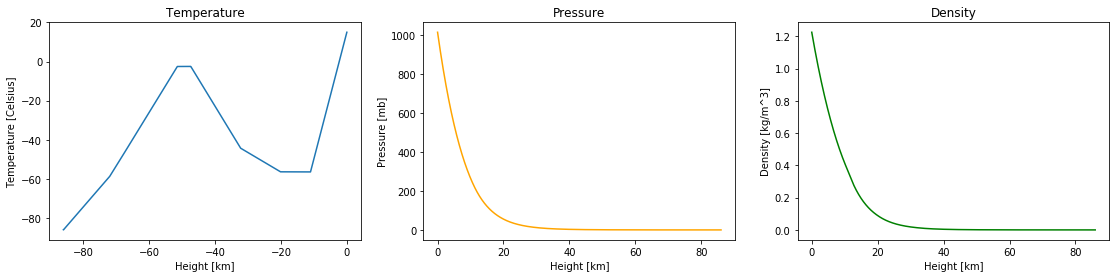

In [5]:
heights = np.linspace(0,86,10000)
results = [USStdAtmos(Z*1000) for Z in heights]
T = [res[0]-273.15 for res in results]
P = [res[1] for res in results]
rho = [res[2] for res in results]

plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(-heights, T)
plt.xlabel("Height [km]")
plt.ylabel("Temperature [Celsius]")
plt.title("Temperature")

plt.subplot(132)
plt.plot(heights, P, color="orange")
plt.xlabel("Height [km]")
plt.ylabel("Pressure [mb]")
plt.title("Pressure")

plt.subplot(133)
plt.plot(heights, rho, color="green")
plt.xlabel("Height [km]")
plt.ylabel("Density [kg/m^3]")
plt.title("Density")

plt.show()

The air at sea level is being pushed down by all of the air above it, resulting in the air having high pressure and density. As we move upward, less air is pushing the air down, resulting in lower pressure and density. Temperature changes also plays a role in the density and pressure of the air, as warming a gas makes it expand. However, these effects are not as apparent.

Put simply, near the warm ground the air is also warm. As you travel further up, temperature decreases as you are further away from the warm ground absorbing energy from the Sun. At a certain point though, the air can absorb solar energy directly from the sun due to the lack of air above blocking solar radiation. At some altitudes, temperature increases  due to higher concentration of certain gases which absorb certain kinds of radiation, like ozone which absorbs ultraviolet radiation (you can see the effect of this starting at 20km in the graph above). Decrease in pressure and density also plays an important role in temperature changes, as less air means less molecules to absorb solar radiation.

## Calculating the movement of a fall into space

We now have functions for finding the anti-gravity and air resistance as you fall into space. We can combine them into a function for finding acceleration. We need to divide the force of air resistance by your mass to find the effect it has on your acceleration. Remember that your mass has no impact on the anti-gravity acceleration.

In [6]:
def acceleration(height, velocity, Cd, A, m):
    density = USStdAtmos(height)[2] #Note that the USStdAtmos fuction returns density as its third return value, hence the [2]
    airRes = drag(density, velocity, Cd, A)
    return airRes/m + antiGravAccel(height)

From here we need to define our initial conditions. We'll use the drag coefficient of 0,7 and cross sectional area of 0.18m^2 for a head first fall. We will also assume you have a mass of 80kg, and that you start on the ground with no initial velocity.

In [7]:
#These values gives us a good look at a fall from 0 to 100km
n = 20000  #The number of steps in the Euler-Cromer calculation
dt = 0.013 #The size of each time-step in the Euler-Cromer calculation

pos = np.zeros(n) #Height in meters
vel = np.zeros(n) #Velocity in m/s
acc = np.zeros(n) #Acceleration in m/s^2

#We will also keep track of these values for the analysis
drg = np.zeros(n)   #Drag
velsq = np.zeros(n) #Velocity squared
dns = np.zeros(n)   #Air density
grv = np.zeros(n)   #Anti-gravity

time = np.linspace(0, n*dt, n)

pos[0] = 0 #These values were already 0, but feel free to change them and see what happens
vel[0] = 0

Cd = 0.7 #Drag coefficient (0.7 for a head first fall)
A = 0.18 #Cross sectional area (1.0 for a head first fall)
m = 80   #Mass

Feel free to change the mass, drag coefficient or cross-sectional area to see how the results would change. A different starting position and velocity could also lead to some interesting results.

We have our initial conditions and function for acceleration in order, so all that's left is using the Euler-Cromer method to find the positions, velocities and accelerations of the movement over time:

In [8]:
for i in range(n-1):
    acc[i] = acceleration(pos[i], vel[i], Cd, A, m)
    vel[i+1] = vel[i] + acc[i]*dt
    pos[i+1] = pos[i] + vel[i+1]*dt
    
    velsq[i] = vel[i]**2
    dns[i] = USStdAtmos(pos[i])[2]
    drg[i] = drag(dns[i], vel[i], Cd, A)/m
    grv[i] = antiGravAccel(pos[i])

#The last values of these arrays need to be calculated seperately
acc[n-1] = acceleration(pos[n-1], vel[n-1], Cd, A, m)
grv[n-1] = antiGravAccel(pos[n-1])
velsq[n-1] = vel[n-1]**2

We use the Euler-Cromer method due to the fact that there is no simple way to get a function for the position or velocity.

We have no way of finding the exact position and velocity that we will have in the future, so instead we find the acceleration right now and use that to find the velocity we would have after a small time step if the acceleration was constant (which it pretty much is over a small time step).

Using this velocity we find the position we would have after a small time step if velocity was constant (which it pretty much is over a small time step). With enough of these small time steps we can approximate a movement with a variable acceleration over a longer period of time.

## The Payoff: Analyzing our results

We can plot height, velocity and acceleration next to eachother to get a look at how they change during the fall.

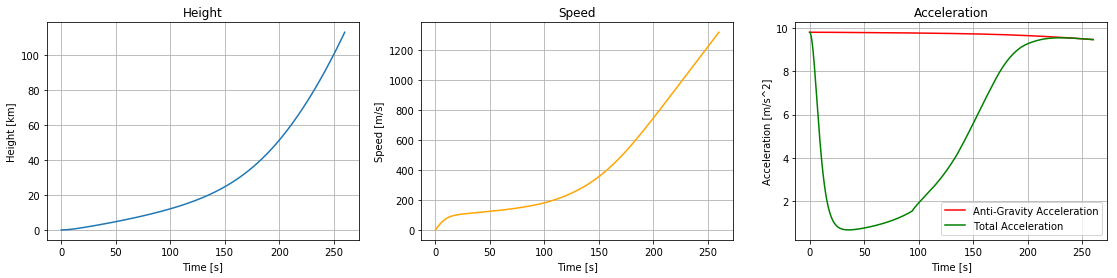

In [9]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(time, pos/1000)
plt.xlabel("Time [s]")
plt.ylabel("Height [km]")
plt.title("Height")
plt.grid()

plt.subplot(132)
plt.plot(time, vel, color="orange")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.title("Speed")
plt.grid()

plt.subplot(133)
plt.plot(time, grv, color="red", label="Anti-Gravity Acceleration")
plt.plot(time, acc, color="green", label="Total Acceleration")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("Acceleration")
plt.grid()
plt.legend()

plt.show()

We observe that anti-gravity stays almost constant through the entire fall, reducing more rapidly towards the end as you rapidly gain more distance from the Earth. Towards the end of the fall into space, anti-gravity is virtually the only contrubutor to the acceleration, as there is no longer a lot of atmosphere to slow you down. The acceleration due to drag has a lot more going on though, it quickly tries to balance out anti-gravity to keep the velocity constant, but then gradually becomes weaker as the atmosphere becomes thinner. We will take a closer look at how this happens in the next section.

We see that you quickly reach a velocity of about 150m/s before the air resistance lowers the acceleration greatly, making the velocity increase very slowly instead. At about the two minute mark the air isn't dense enough to slow you down as much anymore, which makes the speed increase rapidly again.

Height increases very linearly at first, due to the speed being relatively constant. At around two minutes the height starts rising much like a parabola though, due to the fact that as the speed increases the height starts increasing much more.

### Analyzing Acceleration due to Drag

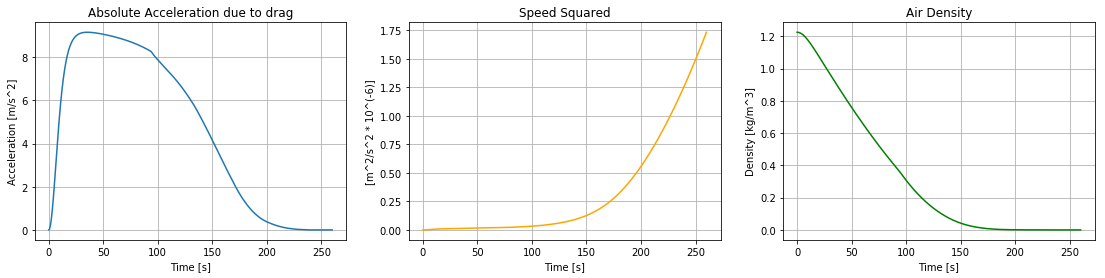

In [10]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(time, -drg)
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("Absolute Acceleration due to drag")
plt.grid()

plt.subplot(132)
plt.plot(time, velsq/1000000, color="orange")
plt.xlabel("Time [s]")
plt.ylabel("[m^2/s^2 * 10^(-6)]")
plt.title("Speed Squared")
plt.grid()

plt.subplot(133)
plt.plot(time, dns, color="green")
plt.xlabel("Time [s]")
plt.ylabel("Density [kg/m^3]")
plt.title("Air Density")
plt.grid()

plt.show()

Acceleration due to drag starts at 0, due to you starting with no velocity, and ends at 0, due to the lack of air in the upper atmosphere.

The speed squared goes from 0 to 1.75 million $m^2/s^2$, while the air density goes from 1.2 to 0 $kg/m^3$.

Despite these three properties being very different in how and why they change, they fit together beautifully to give the fall a very gradual change in acceleration. This gradual change is no accident though, as it comes from the same type of mechanisms that cause things falling normally to reach a constant velocity, their terminal velocity.

In more familiar models for a fall, gravity and air density are both constant. This means that gravity will stay the same, increasing the speed of the falling object while air resistance tries to slow it down. At a certain point though, the object will reach a speed high enough that drag will equal gravity, and the object will from then on keep a constant velocity, as gravity and drag cancel eachother out.

In the first 25 seconds of the fall, you can see something very similar happening. While gravity is almost constant, drag is catching up, as the speed and therefore drag is increasing rapidly. But there is no equilibrium, anti-gravity keeps winning out as drag instead starts decreasing due to the fall in air density. From here, the drag force only becomes weaker, as the air density is decreasing rapidly. It doesen't fall as rapidly as air density does though, as the speed squared is keeping the rapid air density decrease in check, resulting in a more delayed drop.

### The time it takes to fall into space

We can search through the different heights to find the time it takes to reach 100km. We do this by looping through our results until the height is above 100km, and then extracting the current time.

In [11]:
for i in range(len(pos)):
    if pos[i] >= 100000: #If your height reaches 100km
        print(time[i])   #we print the current time
        break            #and stop searching by breaking the loop

249.4824741237062


We find that it takes 249,5 seconds to fall into space!

During these few minutes you would experience a gradual decrease in temperature, followed by a rise in temperature followed by a sudden drop in temperature again. In the meantime you would also quickly get some serious trouble breathing. Beyond the limit we call space, the atmospheric temperature would actually start increasing again, as the Sun is directly heating the air molecules. There wouldn't be enough air to be able to heat you up though, but you do have the Sun which would give you a great tan and some major burns, on the side of you which isn't being turned into a popsicle.

After you have reached space, you are officially an astronaut according to the <a href="https://www.merriam-webster.com/dictionary/astronaut">Marriam-Webester dictionary</a>, which defines an astronaut as "a person who travels beyond the earth's atmosphere", so congrats!

### Summary and Conclusion

We found that it takes 249,5 seconds to fall into space. At the start of the fall, anti-gravity would quickly increase your speed, but then drag will kick in and make the speed stay nearly constant. It won't take long until the air is too thin to slow you down though, resulting in another big speed increase, continuing until you reach the edge of space.

The model for air resistance we used is a very simplified model, so these results probably won't hold up well to reality. However, the interacton of height, air density, velocity and air resistance that this model offers shows some interesting properties of free fall in the atmosphere that have real world implications.

### Sources and Inspiration

Explanations of the various layers of the atmosphere, and the change in temperature, pressure and density
https://en.wikibooks.org/wiki/High_School_Earth_Science/Atmospheric_Layers    
http://www.atmo.arizona.edu/students/courselinks/fall10/nats101s12/ritchie/

The Karman Line - https://books.google.no/books?id=dTwIDun4MroC&pg=PA84&redir_esc=y#v=onepage&q&f=false

Drag - https://en.wikipedia.org/wiki/Drag_(physics)

Drag coefficient - https://en.wikipedia.org/wiki/Drag_coefficient

The US Standard Atmosphere - https://ntrs.nasa.gov/search.jsp?R=19770009539

Geopotential Height - https://en.wikipedia.org/wiki/Geopotential_height

Speed Skydiving - https://en.wikipedia.org/wiki/Speed_skydiving

Drag coefficient approximations(downloads pdf) - https://cnx.org/exports/be308439-f9b1-40e7-b0a6-1631cbc7feaa@8.pdf/drag-forces-8.pdf